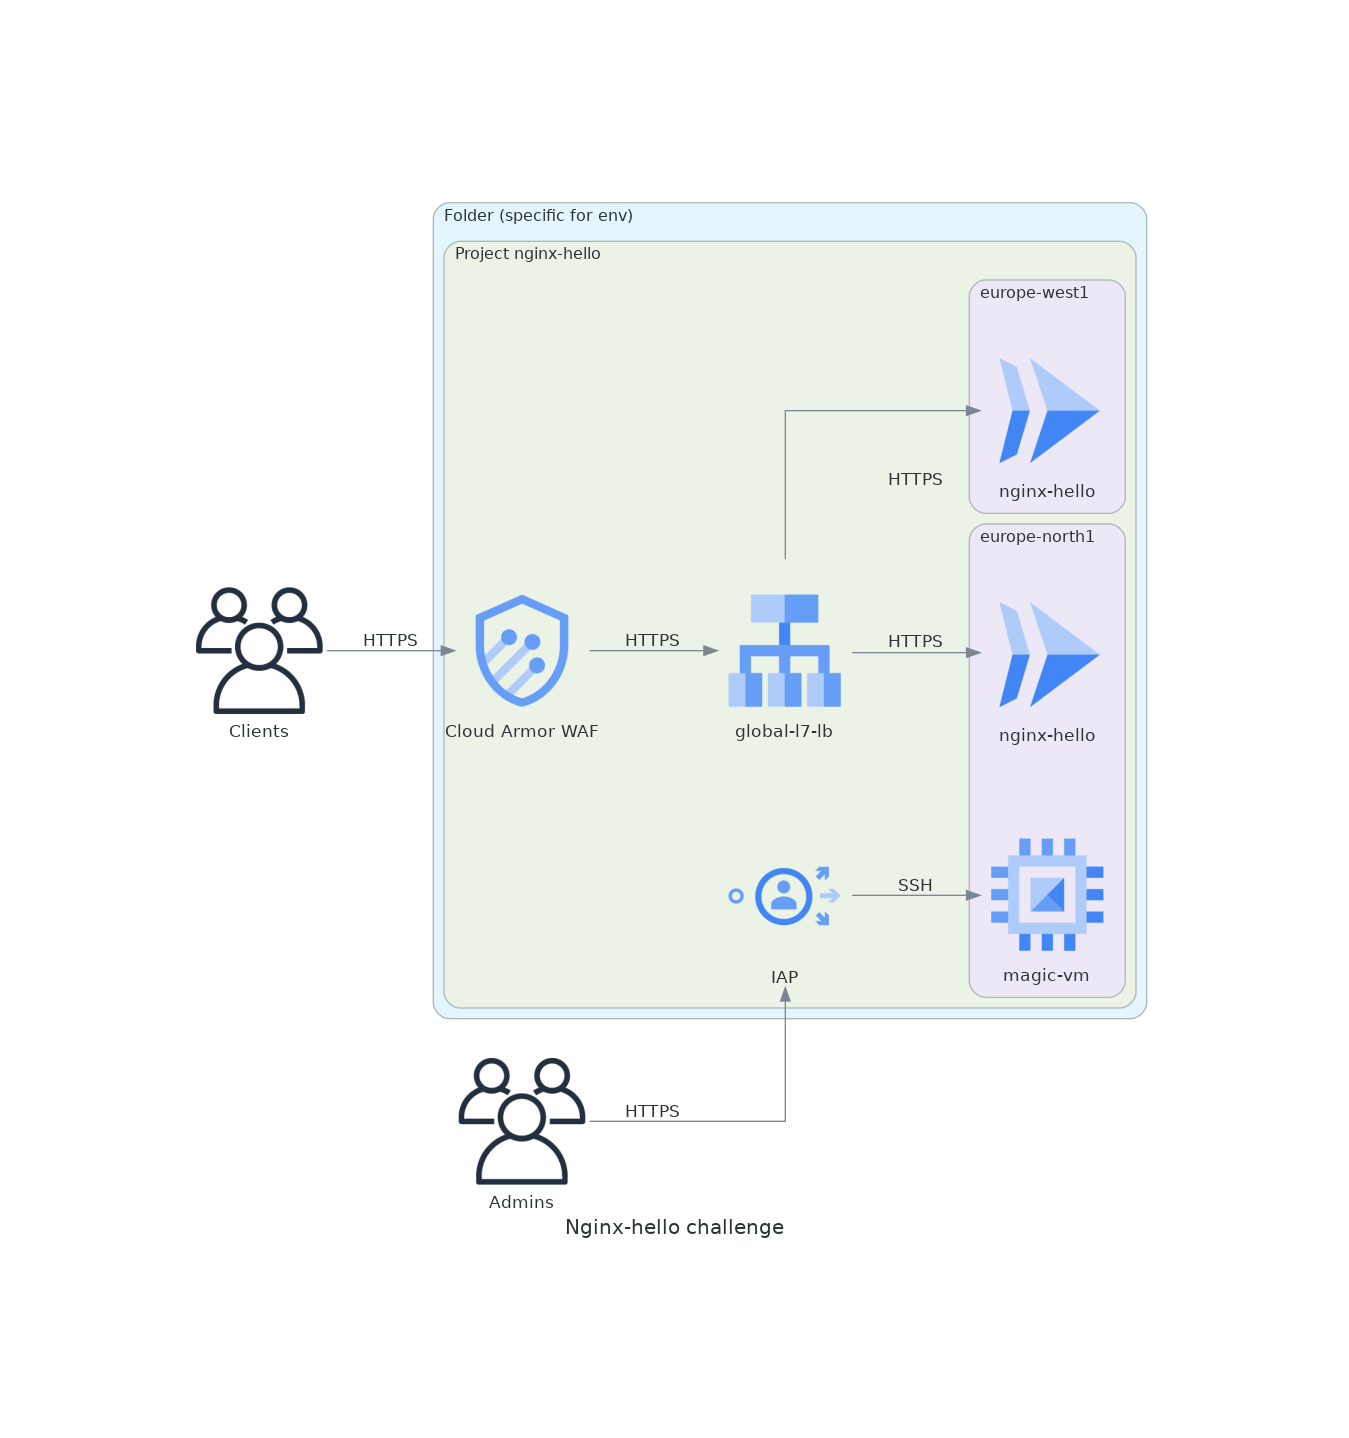

In [10]:
from diagrams import Cluster, Diagram, Edge
from diagrams.gcp.network import LoadBalancing
from diagrams.gcp.compute import Run
from diagrams.gcp.compute import GCE
from diagrams.gcp.network import Network
from diagrams.gcp.network import Armor
from diagrams.gcp.security import IAP
from diagrams.onprem.client import Users

with Diagram("Nginx-hello challenge", show=False) as diag:

    users = Users("Clients")
    admin = Users("Admins", color="red")
    with Cluster("Folder (specific for env)"):
        with Cluster("Project nginx-hello"):

            armor = Armor("Cloud Armor WAF")
            loadbalancing = LoadBalancing("global-l7-lb")
            
            with Cluster("europe-north1"):
                cloudrun_eu_north1 = Run("nginx-hello")
                vm = GCE("magic-vm")
                
            with Cluster("europe-west1"):
                cloudrun_eu_west1 = Run("nginx-hello")


            iap = IAP("IAP")
            
        
    users >> Edge(label="HTTPS") >> armor >> Edge(label="HTTPS") >> loadbalancing 
    loadbalancing >> Edge(label="HTTPS") >> cloudrun_eu_north1
    loadbalancing >> Edge(label="HTTPS") >> cloudrun_eu_west1

    admin >> Edge(label="HTTPS") >> iap >> Edge(label="SSH") >> vm

diag
